In [1]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
import xgboost as xgb

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [2]:
# read in modeling data file
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2']

df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,0,9.0,0,0


In [3]:
# double check the dtypes of the columns
df.dtypes

f0     float64
f1     float64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f10      int64
f11      int64
f12      int64
f13      int64
f14      int64
f15      int64
f16      int64
f17      int64
f18      int64
f19      int64
f20      int64
f21      int64
f22      int64
f23      int64
f24      int64
f25      int64
f26      int64
f27      int64
f28      int64
f29      int64
        ...   
f50      int64
f51      int64
f52      int64
f53      int64
f54      int64
f55      int64
f56      int64
f57      int64
f58      int64
f59      int64
f60      int64
f61      int64
f62      int64
f63      int64
f64      int64
f65      int64
f66      int64
f67      int64
f68      int64
f69      int64
f70      int64
f71      int64
f72      int64
f73      int64
f74      int64
f75      int64
f76      int64
f77    float64
Y1       int64
Y2       int64
Length: 80, dtype: object

In [4]:
# double check the shape of the dataframe
df.shape

(52786, 80)

### Split and Resample Data before Modeling 

In [5]:
# Splitting up our data into features and target
# for this modeling approach I will only be using 1 target at a time 
# the first target will be Accept (ACCP)
X = df.iloc[:, :-2] # Features
Y = df.Y1 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Step-Wise Modeling: ACCP
### 1. Decicion Tree

In [6]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# Train Decision Tree Classifer
dt = dt.fit(X_train_resample,Y_train_resample)

# Predict the target for the test data 
Y_pred = dt.predict(X_test)

In [7]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9169613538772418
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5612
           1       0.94      0.93      0.94     10224

    accuracy                           0.92     15836
   macro avg       0.91      0.91      0.91     15836
weighted avg       0.92      0.92      0.92     15836

[[4969  643]
 [ 672 9552]]


In [8]:
# evaluate the decision tree - taken from competition 2 modeling noteboook
# this evaluation method runs 10 of the dt models and takes an average of the scores 
# gives a more accurate picture of the performance of the model rather than a one-off score 

# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(dt, X_train_resample, Y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    dt_roc_auc = roc_auc_score(Y_test, Y_pred)
    f1_score_lst.append(precision_recall_fscore_support(Y_test, Y_pred, average='weighted')[2])
    auc_lst.append(dt_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

F1 0.9170; AUC 0.9098 


### Feature Importance Based on Decision Tree

In [9]:
# define the feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp

f13    0.628120
f23    0.158784
f3     0.044220
f0     0.016883
f4     0.014853
f25    0.012935
f2     0.012532
f24    0.012421
f1     0.010420
f9     0.008706
f16    0.007835
f59    0.004769
f17    0.004355
f21    0.003401
f74    0.003370
f11    0.003195
f77    0.002872
f14    0.002746
f12    0.002740
f15    0.002619
f19    0.002585
f32    0.002264
f34    0.002234
f10    0.002134
f20    0.002117
f18    0.002082
f55    0.002005
f45    0.001961
f64    0.001828
f54    0.001650
         ...   
f53    0.000428
f42    0.000409
f39    0.000402
f35    0.000400
f33    0.000334
f28    0.000330
f56    0.000314
f68    0.000276
f40    0.000269
f60    0.000258
f46    0.000240
f63    0.000216
f61    0.000187
f71    0.000152
f38    0.000149
f49    0.000134
f70    0.000127
f58    0.000101
f41    0.000095
f66    0.000075
f65    0.000069
f52    0.000055
f69    0.000000
f43    0.000000
f22    0.000000
f27    0.000000
f47    0.000000
f6     0.000000
f5     0.000000
f67    0.000000
Length: 78, dtype: float

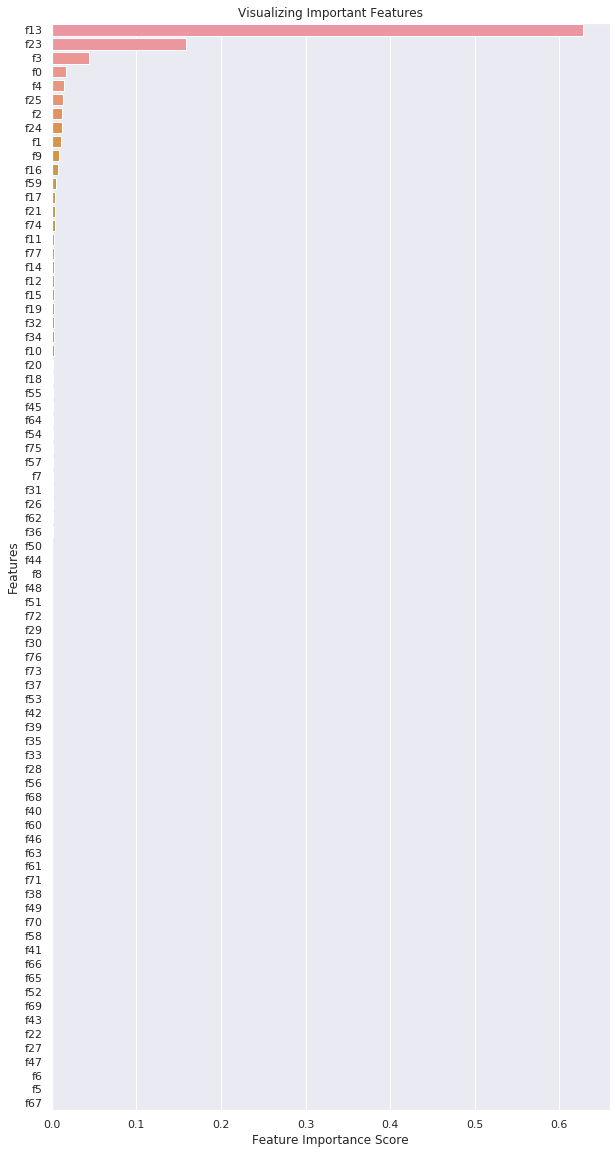

In [31]:
# visualize the feature importance values 
plt.figure(figsize=(10,20))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

### 2. Logistic Regression

In [11]:
# build logistic regression
# specify a solver to aviod a warning message 
logreg = LogisticRegression(solver='liblinear',random_state=2019)

# fit the training data to the model
logreg = logreg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=logreg.predict(X_test)

In [12]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9353372063652438
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5612
           1       0.96      0.94      0.95     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.93      0.93     15836
weighted avg       0.94      0.94      0.94     15836

[[5205  407]
 [ 617 9607]]


In [13]:
# evaluate the logistic regression using the same method as decision tree 

# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train_resample, Y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    clf_roc_auc = roc_auc_score(Y_test, Y_pred)
    f1_score_lst.append(precision_recall_fscore_support(Y_test, Y_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

F1 0.9356; AUC 0.9336 


### 3. XGBoost

In [14]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [15]:
# evluate xgboost
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9393154837080071
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5612
           1       0.96      0.94      0.95     10224

    accuracy                           0.94     15836
   macro avg       0.93      0.94      0.93     15836
weighted avg       0.94      0.94      0.94     15836

[[5250  362]
 [ 599 9625]]


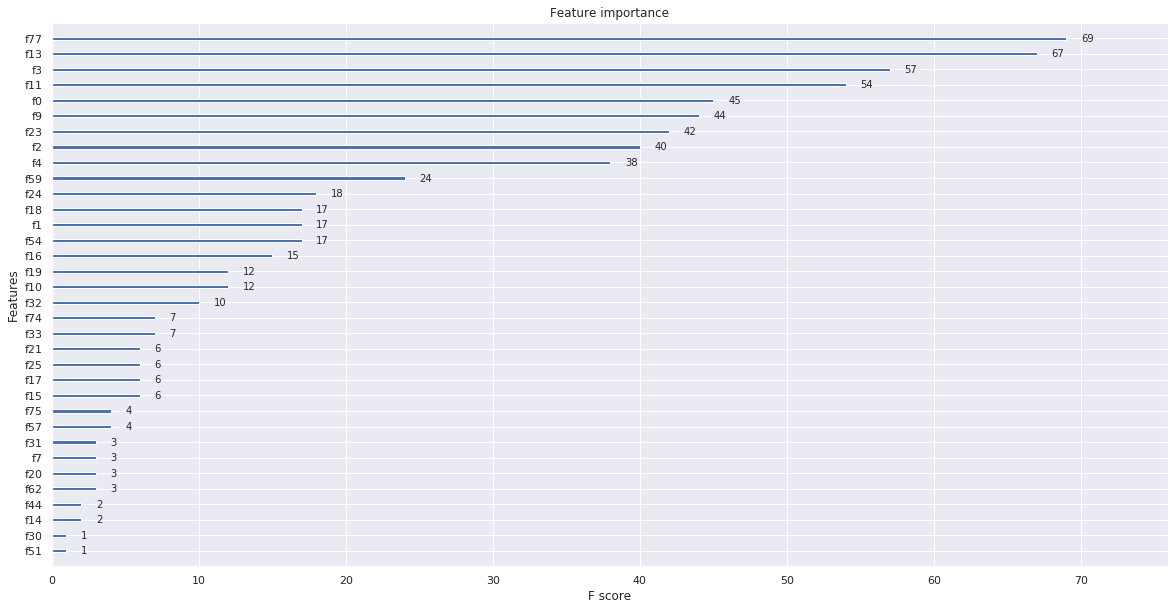

In [30]:
# visualize the feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

### 4. Random Forest
*- Please reference Random Forest Notebook: [Random Forest Y1 (ACCP)](ba590_capstone/sw_random_forest_tt.ipynb)*

## Step-Wise Modeling: CONF

In [17]:
# filter out the students that were not accepted (where ACCP=0)
df = df[df.Y1 != 0]
#df = df.drop(['Y1'], axis=1)
df.shape

(33956, 80)

In [18]:
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f70,f71,f72,f73,f74,f75,f76,f77,Y1,Y2
48,0.649921,-0.010433,-0.018399,-0.018279,0.029160,-0.024231,-0.02066,0.968218,-3.701231,-3.011022,...,0,0,0,0,0,0,0,5.0,1,0
67,-0.018210,-0.010433,-0.018399,-0.018279,-0.156589,-0.024231,-0.02066,2.848948,-2.593895,-3.011022,...,0,0,0,0,0,0,0,5.0,1,0


### Re-Split and Re-Balance the Data

In [19]:
# Splitting up our data into features and target
# for this modeling approach I will only be using 1 target at a time 
# the second target is Confirm (CONF)
X = df.iloc[:, :-2] # Features
Y = df.Y2 # Target

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the ACCP target 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

### 1. Decision Tree

In [20]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# Train Decision Tree Classifer
dt = dt.fit(X_train_resample,Y_train_resample)

# Predict the target for the test data 
Y_pred = dt.predict(X_test)

In [21]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.756159811524492
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8696
           1       0.22      0.25      0.23      1491

    accuracy                           0.76     10187
   macro avg       0.54      0.55      0.54     10187
weighted avg       0.77      0.76      0.76     10187

[[7324 1372]
 [1112  379]]


In [22]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(dt, X_train_resample, Y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    dt_roc_auc = roc_auc_score(Y_test, Y_pred)
    f1_score_lst.append(precision_recall_fscore_support(Y_test, Y_pred, average='weighted')[2])
    auc_lst.append(dt_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

F1 0.7641; AUC 0.5482 


In [23]:
# define the feature importance variable 
feature_imp_conf = pd.Series(dt.feature_importances_,index=df.iloc[:,:-2].columns).sort_values(ascending=False)

# print the results 
feature_imp_conf

f4     0.208757
f77    0.069994
f3     0.064469
f0     0.057701
f1     0.057636
f2     0.057615
f24    0.043623
f25    0.043303
f12    0.028735
f8     0.025848
f9     0.025601
f17    0.020446
f21    0.019991
f10    0.019721
f7     0.016869
f74    0.015885
f11    0.015666
f16    0.015167
f31    0.013895
f19    0.012342
f32    0.010913
f20    0.009705
f26    0.009436
f15    0.009228
f59    0.008235
f64    0.008032
f45    0.007782
f55    0.007654
f34    0.007194
f54    0.006166
         ...   
f42    0.001875
f23    0.001692
f73    0.001557
f49    0.001515
f63    0.001125
f43    0.001109
f35    0.000991
f46    0.000978
f70    0.000816
f61    0.000808
f68    0.000773
f53    0.000765
f69    0.000698
f66    0.000635
f41    0.000549
f71    0.000541
f72    0.000491
f38    0.000401
f27    0.000343
f65    0.000336
f28    0.000269
f76    0.000262
f58    0.000208
f52    0.000161
f60    0.000000
f67    0.000000
f6     0.000000
f5     0.000000
f47    0.000000
f22    0.000000
Length: 78, dtype: float

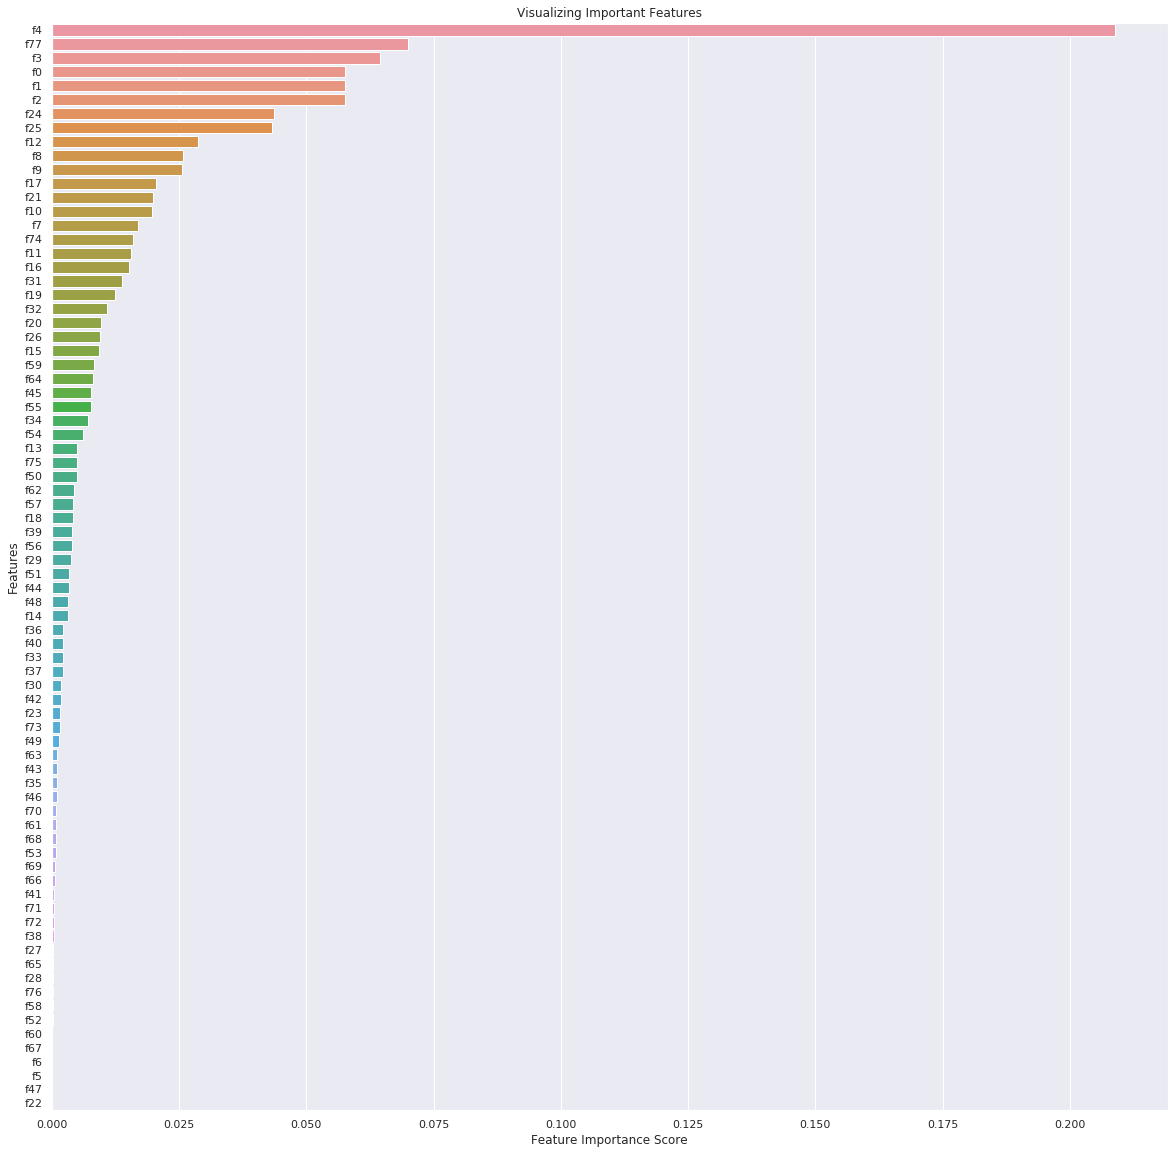

In [38]:
# visualize the feature importance values 
plt.figure(figsize=(20,20))

# Creating a bar plot
sns.barplot(x=feature_imp_conf, y=feature_imp_conf.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

### 2. Logistic Regression

In [25]:
# build logistic regression
# specify a solver to aviod a warning message 
logreg = LogisticRegression(solver='liblinear',random_state=2019)

# fit the training data to the model
logreg = logreg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=logreg.predict(X_test)

In [26]:
# print evaluation metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.6368901541179935
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      8696
           1       0.22      0.59      0.32      1491

    accuracy                           0.64     10187
   macro avg       0.56      0.62      0.54     10187
weighted avg       0.80      0.64      0.69     10187

[[5613 3083]
 [ 616  875]]


In [27]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train_resample, Y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    clf_roc_auc = roc_auc_score(Y_test, Y_pred)
    f1_score_lst.append(precision_recall_fscore_support(Y_test, Y_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

F1 0.6891; AUC 0.6162 


### 3. XGBoost

In [32]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [33]:
# evluate xgboost
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.6529891037596938
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      8696
           1       0.23      0.57      0.33      1491

    accuracy                           0.65     10187
   macro avg       0.56      0.62      0.55     10187
weighted avg       0.80      0.65      0.70     10187

[[5800 2896]
 [ 639  852]]


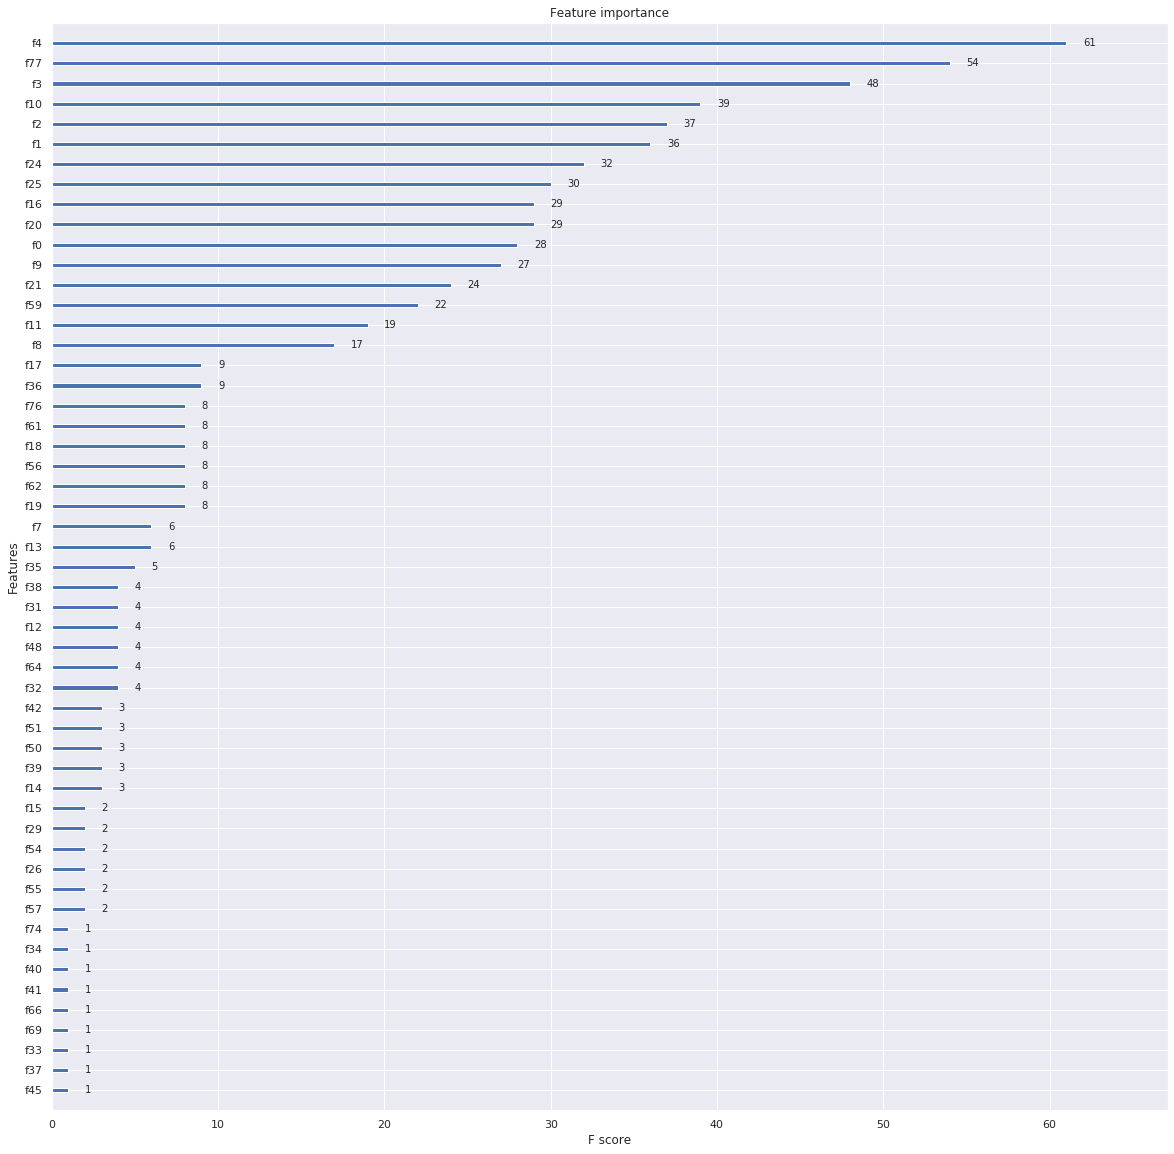

In [36]:
# visualize the feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

### 4. Random Forest
*-Please Reference Random Forest Notebook: [Random Forest Y2 (CONF)](ba590_capstone/sw_random_forest_tt.ipynb)*